In [1951]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1952]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Importing Data

In [1953]:
# Importing lead dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [1954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1955]:
df.shape

(9240, 37)

In [1956]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1957]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Lot of null values can be observed in the data set. We will now tackle each of these and treat them.

### Step 3: Data Preparation

In [1958]:
# Drop columns which has null values more than 3000 
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() > 3000]
columns_to_drop

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [1959]:
df = df.drop(columns=columns_to_drop, axis=1)

In [1960]:
# Finding the null percentages across columns
#round(df.isnull().sum()/len(df.index),2)*100
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1961]:
df.shape

(9240, 31)

In [1962]:
# Inspecting Country column

columns_to_count = ['Country']

for column_name in columns_to_count:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")


Value counts for Country:
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia          

In [1963]:
# Since 'Country' column is highly skewed towards India, we can drop this column

df.drop(columns=['Country'],axis=1, inplace=True)

In [1964]:
df.shape

(9240, 30)

In [1965]:
# Value counts for columns

for col in df:
    print('***************************************')
    print(df[col].astype('category').value_counts())

***************************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
***************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
***************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**

In [1966]:
# Reconfirming value_counts for columns which would be dropped
columns_to_count = ['Through Recommendations', 'Receive More Updates About Our Courses',
                    'Get updates on DM Content', 'Update me on Supply Chain Content',
                    'Lead Profile', 'Do Not Call', 'What matters most to you in choosing a course',
                    'How did you hear about X Education']

for column_name in columns_to_count:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")


Value counts for Through Recommendations:
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Value counts for Receive More Updates About Our Courses:
No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Value counts for Get updates on DM Content:
No    9240
Name: Get updates on DM Content, dtype: int64

Value counts for Update me on Supply Chain Content:
No    9240
Name: Update me on Supply Chain Content, dtype: int64

Value counts for Lead Profile:
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Value counts for Do Not Call:
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Value counts for What matters most to you in choosing a course:
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: W

In [1967]:
# Dropping columns which are highly skewed
df.drop(columns=['Through Recommendations','Receive More Updates About Our Courses',
                 'Get updates on DM Content','Update me on Supply Chain Content','Lead Profile','Do Not Call',
                 'What matters most to you in choosing a course',
                 'How did you hear about X Education'],
        axis=1, inplace=True)
df.shape

(9240, 22)

In [1968]:
df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
City                                        1420
I agree to pay the amount through cheque       0
A free copy of Maste

In [1969]:
for col in df:
    print('***************************************')
    print(df[col].astype('category').value_counts())

***************************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
***************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
***************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**

In [1970]:
# Reconfirming value_counts for columns which would be dropped
columns_to_count = ['Newspaper','I agree to pay the amount through cheque','Newspaper Article',
                    'Digital Advertisement','Magazine','Search','X Education Forums']

for column_name in columns_to_count:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")


Value counts for Newspaper:
No     9239
Yes       1
Name: Newspaper, dtype: int64

Value counts for I agree to pay the amount through cheque:
No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Value counts for Newspaper Article:
No     9238
Yes       2
Name: Newspaper Article, dtype: int64

Value counts for Digital Advertisement:
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Value counts for Magazine:
No    9240
Name: Magazine, dtype: int64

Value counts for Search:
No     9226
Yes      14
Name: Search, dtype: int64

Value counts for X Education Forums:
No     9239
Yes       1
Name: X Education Forums, dtype: int64



In [1971]:
# Dropping columns which are highly skewed
df.drop(columns=['Newspaper','I agree to pay the amount through cheque','Newspaper Article','Digital Advertisement',
                'Magazine','Search','X Education Forums'],
        axis=1, inplace=True)
df.shape

(9240, 15)

In [1972]:
for col in df:
    print('***************************************')
    print(df[col].astype('category').value_counts())

***************************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
***************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
***************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**

In [1973]:
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1974]:
df.shape

(9240, 15)

#### Column: 'Specialization'

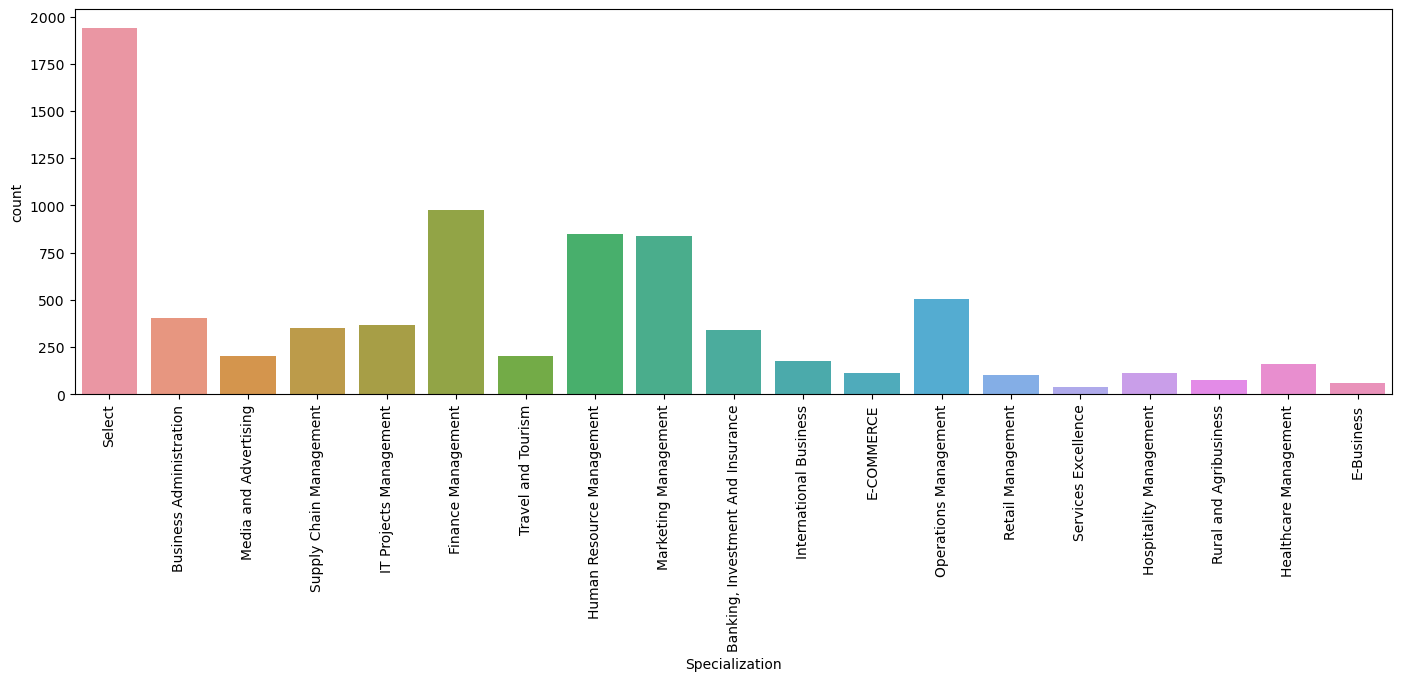

In [1975]:
plt.figure(figsize=(17, 5))
sns.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

In [1976]:
# Creating a new category 'Others' for some of the Specialization which do not have any values. 

df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
df['Specialization'].value_counts()

Select                               1942
Others                               1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Column: 'City'

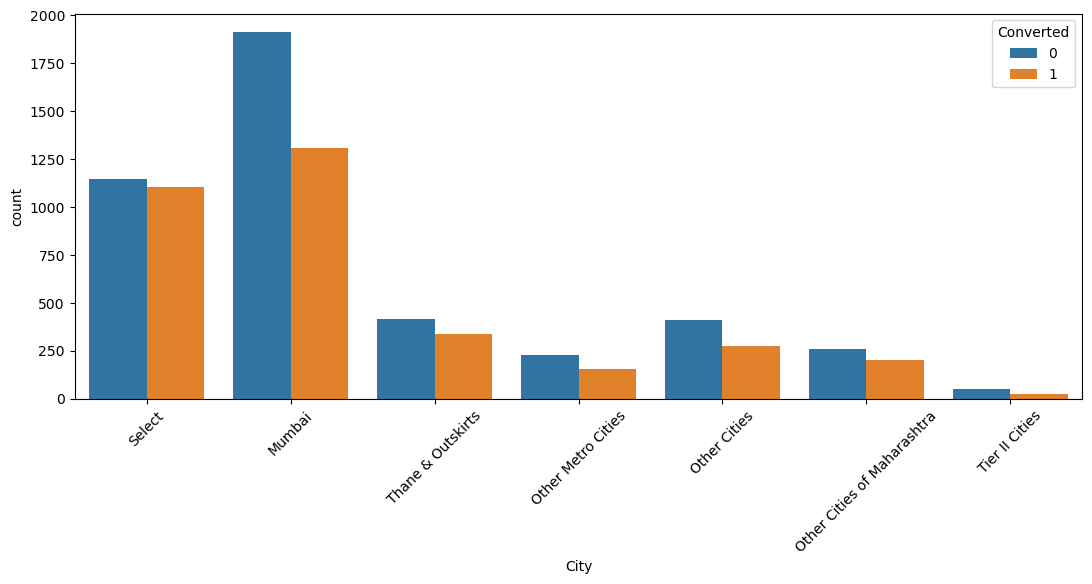

In [1977]:
plt.figure(figsize=(13,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

In [1978]:
# Creating a new category 'Select' for some of the City which do not have any values. 
# Merging 'Select' with 'Other Cities'

df['City'] = df['City'].replace(np.nan, 'Select')
df['City'] = df['City'].replace('Select', 'Other Cities')

#### Column: 'What is your current occupation'

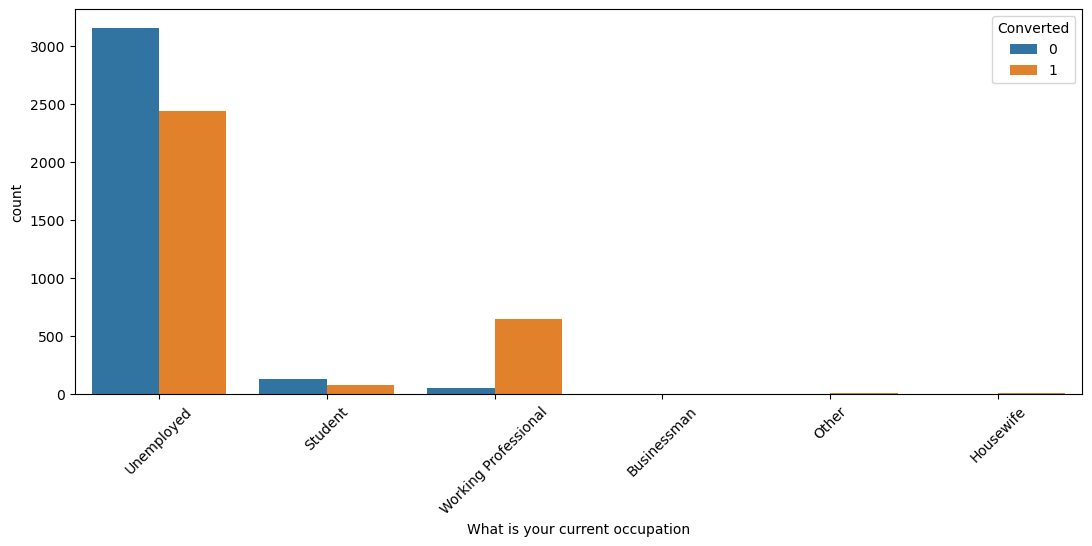

In [1979]:
plt.figure(figsize=(13,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

In [1980]:
# Merging Others for items which do not have any values.
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Other')
df['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1981]:
# Reconfirming value_counts for columns which would be dropped
columns_to_count = ['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']

for column_name in columns_to_count:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")


Value counts for Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Value counts for TotalVisits:
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0       

In [1982]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [1983]:
df.shape

(9240, 15)

#### Dropping rest of the rows which have null values

In [1984]:
df=df[~pd.isnull(df['Last Activity'])]
df.shape

(9137, 15)

In [1985]:
df=df[~pd.isnull(df['Page Views Per Visit'])]
df.shape

(9103, 15)

In [1986]:
df=df[~pd.isnull(df['Total Time Spent on Website'])]
df.shape

(9103, 15)

In [1987]:
df=df[~pd.isnull(df['Lead Source'])]
df.shape

(9074, 15)

In [1988]:
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### We have 9074/9240 = 98.2% of rows to model the data upon

In [1989]:
# Dropping 'Prospect ID' and 'Lead Number' 
df.drop(columns=['Prospect ID','Lead Number'],
        axis=1, inplace=True)
df.shape

(9074, 13)

In [1990]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Other Cities,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Other Cities,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


## EDA

In [1991]:
df.shape

(9074, 13)

In [1992]:
df[df.duplicated()]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Other,Other Cities,No,Modified
16,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Other,Other Cities,No,Modified
47,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Other,Other Cities,No,Modified
49,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Other,Other Cities,No,Modified
83,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Other,Other Cities,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9182,API,Olark Chat,No,0,0.0,0,0.0,SMS Sent,Select,Unemployed,Other Cities,No,Modified
9187,API,Olark Chat,No,1,0.0,0,0.0,SMS Sent,Others,Other,Other Cities,No,SMS Sent
9199,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Select,Unemployed,Other Cities,No,Modified
9217,API,Olark Chat,No,0,0.0,0,0.0,SMS Sent,Select,Unemployed,Other Cities,No,SMS Sent


In [1993]:
df=df[df.duplicated(keep='first') == False]
df.shape

(7316, 13)

#### 1732(about 19%) duplicate rows are removed.

In [1994]:
# Convertion Rate

(sum(df['Converted'])/len(df['Converted'].index))*100

38.805358119190814

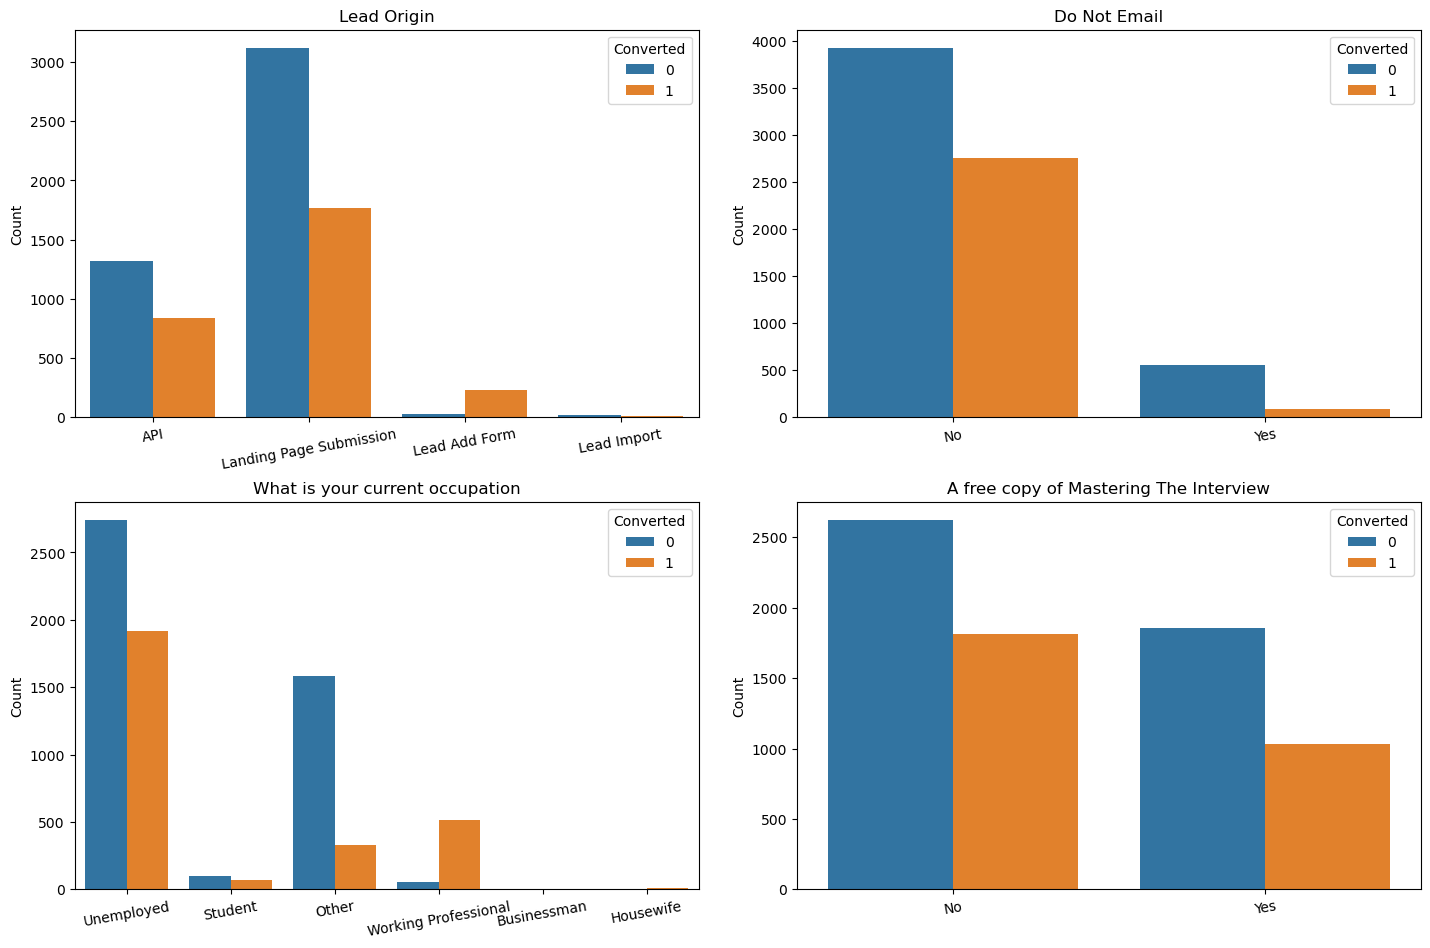

In [1995]:

# List of categorical columns
categorical_columns = [
    "Lead Origin", "Do Not Email", "What is your current occupation", 
    "A free copy of Mastering The Interview", 
    #"Lead Source", "Last Activity", "Specialization", 
    #"Tags", "Last Notable Activity"
]

# Set up subplots
num_rows = (len(categorical_columns) + 1) // 2  # Calculate the number of subplot rows
num_cols = 2  # Number of subplot columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Loop through categorical columns and create subplots
for idx, column in enumerate(categorical_columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    sns.countplot(x=column, hue="Converted", data=df, ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
    ax.set_xlabel(None)
    ax.set_ylabel("Count")

plt.show()


#### Bivariate analysis for column 'Lead Source'

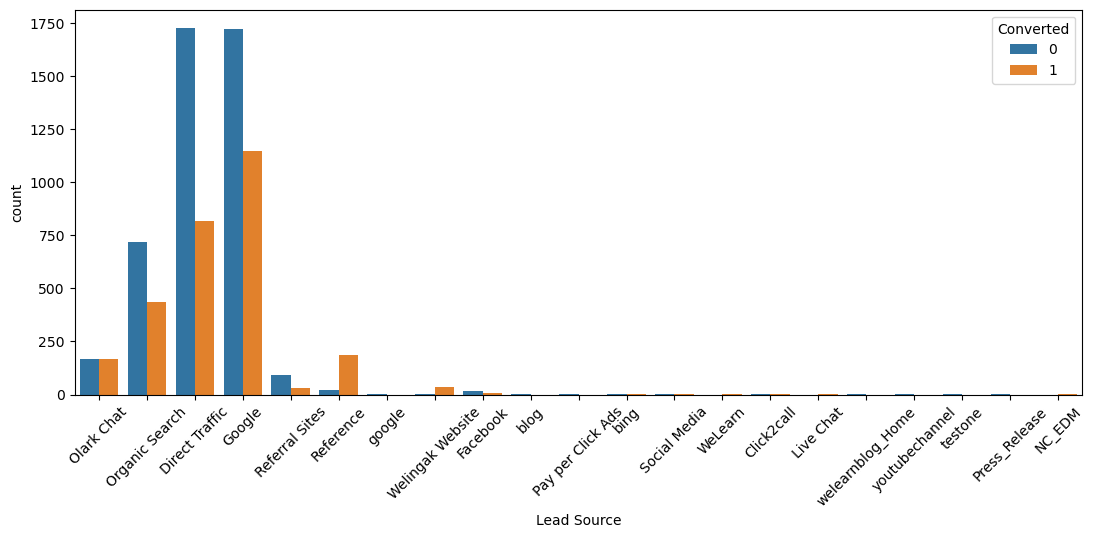

In [1996]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

In [1997]:
df['Lead Source'].value_counts()

Google               2865
Direct Traffic       2543
Organic Search       1152
Olark Chat            335
Reference             207
Referral Sites        125
Welingak Website       37
Facebook               25
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
welearnblog_Home        1
testone                 1
youtubechannel          1
Pay per Click Ads       1
Live Chat               1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1998]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media',
                                                            'welearnblog_Home','testone','youtubechannel',
                                                            'Pay per Click Ads','Live Chat','WeLearn',
                                                            'blog','NC_EDM'], 'Others')

df['Lead Source'].value_counts()

Google              2870
Direct Traffic      2543
Organic Search      1152
Olark Chat           335
Reference            207
Referral Sites       125
Welingak Website      37
Facebook              25
Others                22
Name: Lead Source, dtype: int64

#### Bivariate analysis for column 'Last Activity'

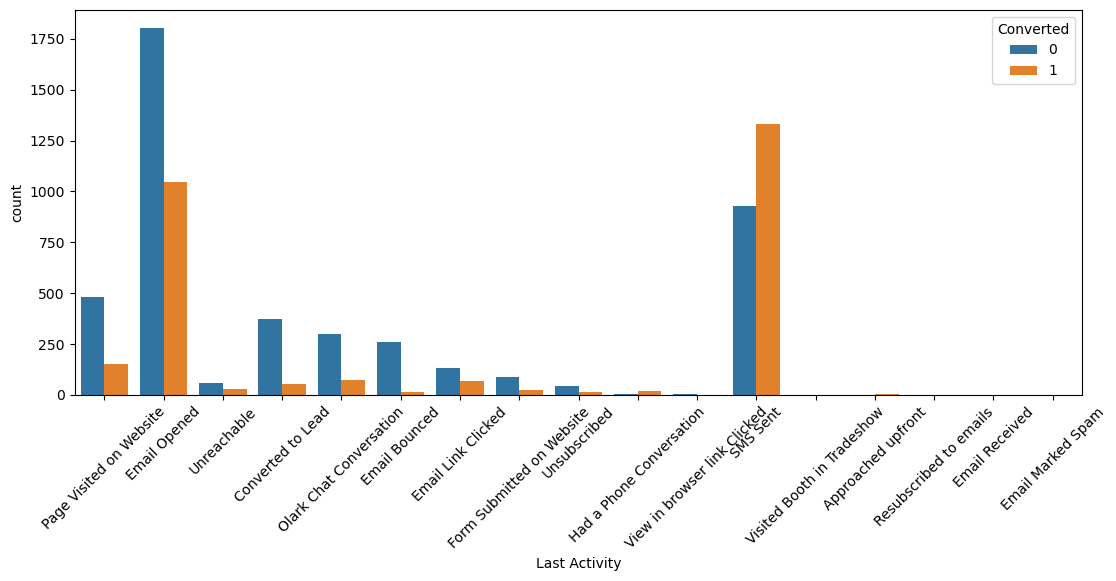

In [1999]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

In [2000]:
df['Last Activity'].value_counts()

Email Opened                    2849
SMS Sent                        2257
Page Visited on Website          634
Converted to Lead                426
Olark Chat Conversation          371
Email Bounced                    276
Email Link Clicked               201
Form Submitted on Website        115
Unreachable                       89
Unsubscribed                      57
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2001]:
# Creating a new category 'Others' for some of the Last Activity which do not have much values.
df['Last Activity'] = df['Last Activity'].replace(['Resubscribed to emails', 'Visited Booth in Tradeshow',
                                                  'Email Marked Spam', 'Email Received','Approached upfront',
                                                  'View in browser link Clicked'], 'Others')

df['Last Activity'].value_counts()

Email Opened                 2849
SMS Sent                     2257
Page Visited on Website       634
Converted to Lead             426
Olark Chat Conversation       371
Email Bounced                 276
Email Link Clicked            201
Form Submitted on Website     115
Unreachable                    89
Unsubscribed                   57
Had a Phone Conversation       25
Others                         16
Name: Last Activity, dtype: int64

#### Bivariate analysis for column 'Specialization'

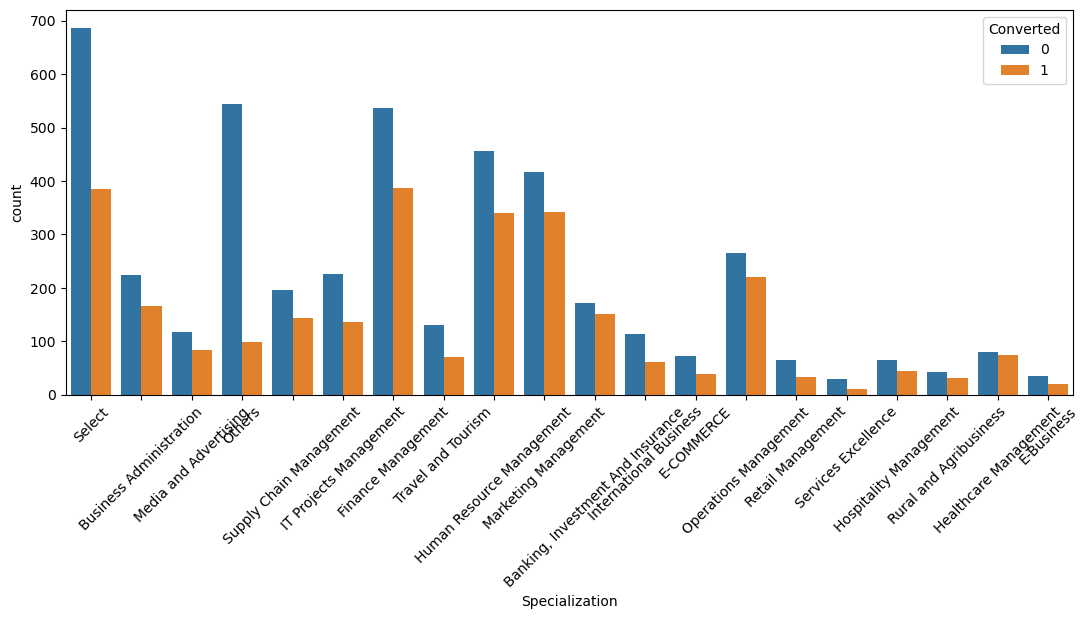

In [2002]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

In [2003]:
#No need for any treatment for this column
df['Specialization'].value_counts()

Select                               1071
Finance Management                    923
Human Resource Management             797
Marketing Management                  758
Others                                644
Operations Management                 485
Business Administration               390
IT Projects Management                363
Supply Chain Management               340
Banking, Investment And Insurance     322
Travel and Tourism                    201
Media and Advertising                 201
International Business                176
Healthcare Management                 154
E-COMMERCE                            111
Hospitality Management                110
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Bivariate analysis for column 'Last Notable Activity'

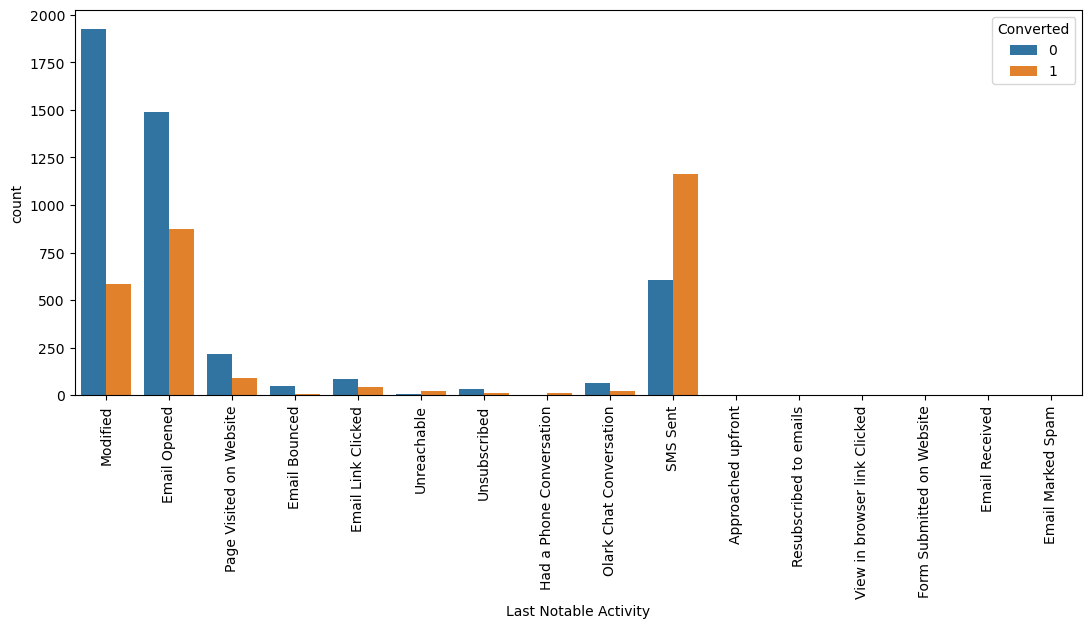

In [2004]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [2005]:
df['Last Notable Activity'].value_counts()

Modified                        2514
Email Opened                    2363
SMS Sent                        1765
Page Visited on Website          312
Email Link Clicked               126
Olark Chat Conversation           86
Email Bounced                     55
Unsubscribed                      43
Unreachable                       31
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [2006]:
# Creating a new category 'Others' for some of the Last Notable Activity which do not have much values.
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Received','Form Submitted on Website',
                                                                  'View in browser link Clicked', 
                                                                   'Resubscribed to emails', 'Approached upfront',
                                                                  'Email Marked Spam'], 'Others')

df['Last Notable Activity'].value_counts()

Modified                    2514
Email Opened                2363
SMS Sent                    1765
Page Visited on Website      312
Email Link Clicked           126
Olark Chat Conversation       86
Email Bounced                 55
Unsubscribed                  43
Unreachable                   31
Had a Phone Conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64

#### Bivariate analysis for column 'City'

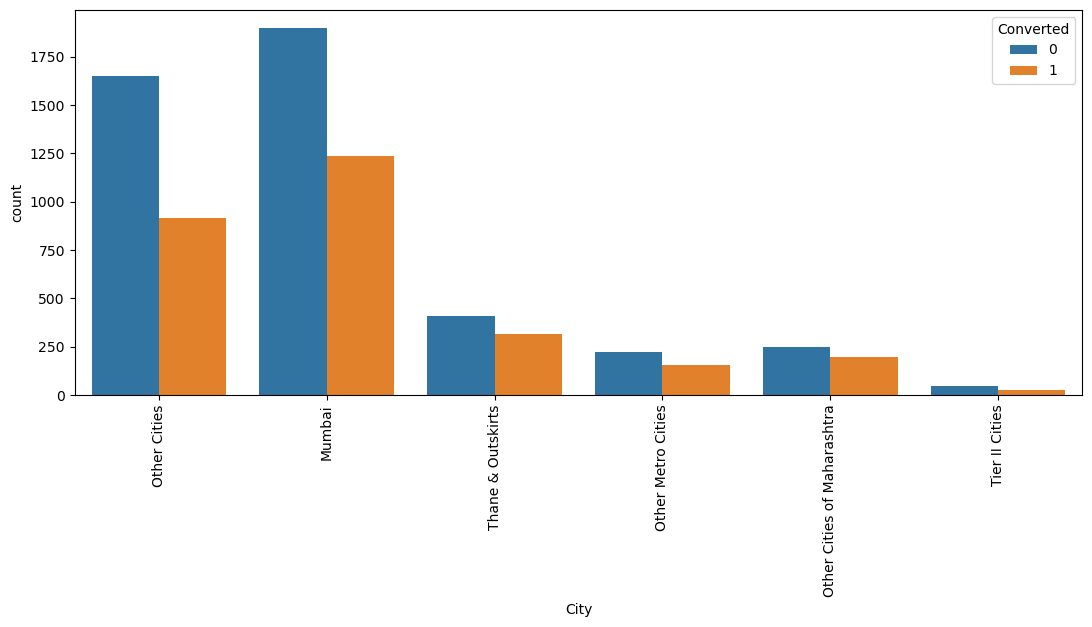

In [2007]:
plt.figure(figsize=(13,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Analysis for numerical columns

In [2008]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.388054,4.285128,598.766266,2.938320
std,0.487340,5.072478,547.167320,2.030291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,139.000000,2.000000
50%,0.000000,3.000000,362.500000,2.500000
75%,1.000000,5.000000,1073.000000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Numerical analysis for column 'TotalVisits'

<Axes: >

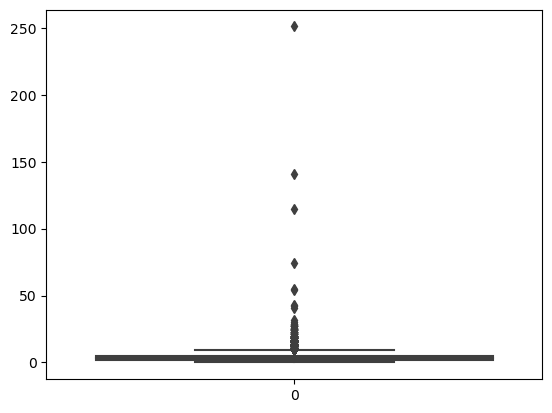

In [2009]:
sns.boxplot(df['TotalVisits'])

In [2010]:
# Replacing outliers with 95%ile of value
df['TotalVisits'][df['TotalVisits'] >= df['TotalVisits'].quantile(0.95)] = df['TotalVisits'].quantile(0.95)

<Axes: xlabel='Converted', ylabel='TotalVisits'>

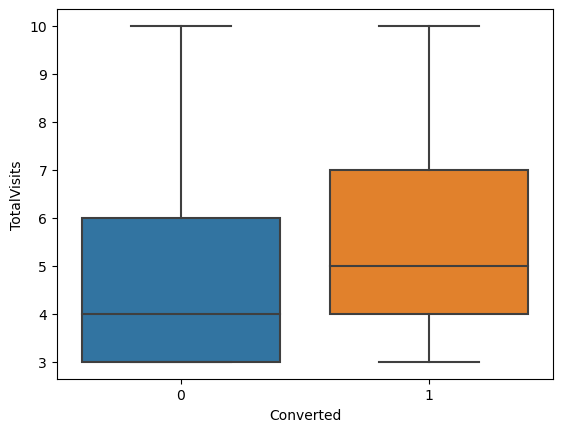

In [2011]:
sns.boxplot(y = df['TotalVisits'][df['TotalVisits'] >= df['TotalVisits'].quantile(0.5)], x = 'Converted', data = df)

#### Numerical analysis for column 'Total Time Spent on Website'

<Axes: >

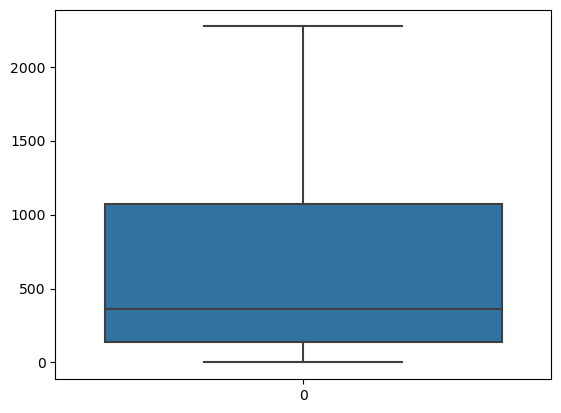

In [2012]:
sns.boxplot(df['Total Time Spent on Website'])

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

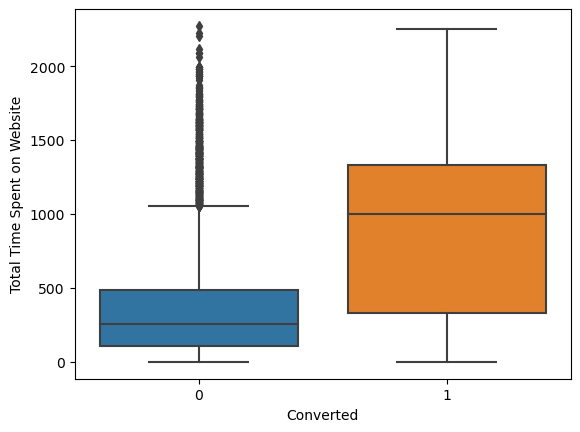

In [2013]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

#### Numerical analysis for column 'Page Views Per Visit'

<Axes: >

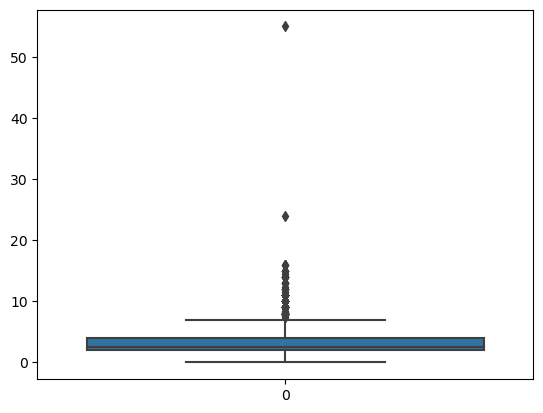

In [2014]:
sns.boxplot(df['Page Views Per Visit'])

In [2015]:
# Replacing outliers with 95%ile of value
df['Page Views Per Visit'][df['Page Views Per Visit'] >= df['Page Views Per Visit'].quantile(0.95)] = df['Page Views Per Visit'].quantile(0.95)

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

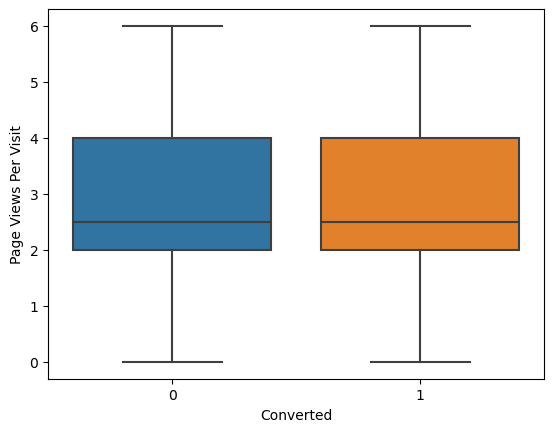

In [2016]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [2017]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.388054,3.957490,598.766266,2.809072
std,0.487340,2.561447,547.167320,1.566120
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,139.000000,2.000000
50%,0.000000,3.000000,362.500000,2.500000
75%,1.000000,5.000000,1073.000000,4.000000
max,1.000000,10.000000,2272.000000,6.000000


In [2018]:
df_copy = df.copy()
df.shape

(7316, 13)

In [2019]:
for col in df:
    print('***************************************')
    print(df[col].astype('category').value_counts())

***************************************
Landing Page Submission    4884
API                        2156
Lead Add Form               252
Lead Import                  24
Name: Lead Origin, dtype: int64
***************************************
Google              2870
Direct Traffic      2543
Organic Search      1152
Olark Chat           335
Reference            207
Referral Sites       125
Welingak Website      37
Facebook              25
Others                22
Name: Lead Source, dtype: int64
***************************************
No     6669
Yes     647
Name: Do Not Email, dtype: int64
***************************************
0    4477
1    2839
Name: Converted, dtype: int64
***************************************
2.0     1676
3.0     1305
4.0     1120
5.0      783
10.0     467
6.0      466
0.0      408
1.0      394
7.0      309
8.0      224
9.0      164
Name: TotalVisits, dtype: int64
***************************************
0       412
60       19
127      18
75       18
157      17
 

#### Converting some binary variables (Yes/No) to 1/0

In [2020]:
vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

df[vars] = df[vars].applymap({'Yes': 1, 'No': 0}.get)

In [2021]:
df1=df.loc[:,df.dtypes=='object']
df1.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

#### Creating Dummy variables for the categorical features:

In [2022]:
dummy=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
                         'What is your current occupation', 'City',
                         'Last Notable Activity']])

In [2023]:
df=pd.concat([df,dummy],axis=1)


In [2024]:
df.shape

(7316, 61)

In [2025]:
dummy=pd.get_dummies(df[['Specialization']])
dummy=dummy.drop(['Specialization_Select'],1)

In [2026]:
# dropping orginal columns for which dummy variables are created
df=pd.concat([df,dummy],axis=1)
df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                         'What is your current occupation', 'City',
                         'Last Notable Activity'],
        axis=1, inplace=True)

In [2027]:
df.shape

(7316, 73)

In [2028]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4: Test-Train Split

In [2029]:
from sklearn.model_selection import train_test_split

In [2030]:
# Creating dependent and independent data sets
X = df.drop(['Converted'], axis=1)
y=df['Converted']

In [2031]:
print(X.shape, y.shape)

(7316, 72) (7316,)


In [2032]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=80)

In [2033]:
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(5121, 72) (2195, 72) (5121,) (2195,)


In [2034]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
    

### Step 5: Feature Scaling

In [2035]:
from sklearn.preprocessing import MinScaler

# Using StandardScaler to Rescaling the features
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [2036]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4802,0,0.2,0.527289,0.166667,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8302,0,0.2,0.161972,0.333333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8724,0,0.3,0.171215,0.500000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6932,0,0.0,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1716,0,0.2,0.567782,0.333333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 6: Looking at Correlations

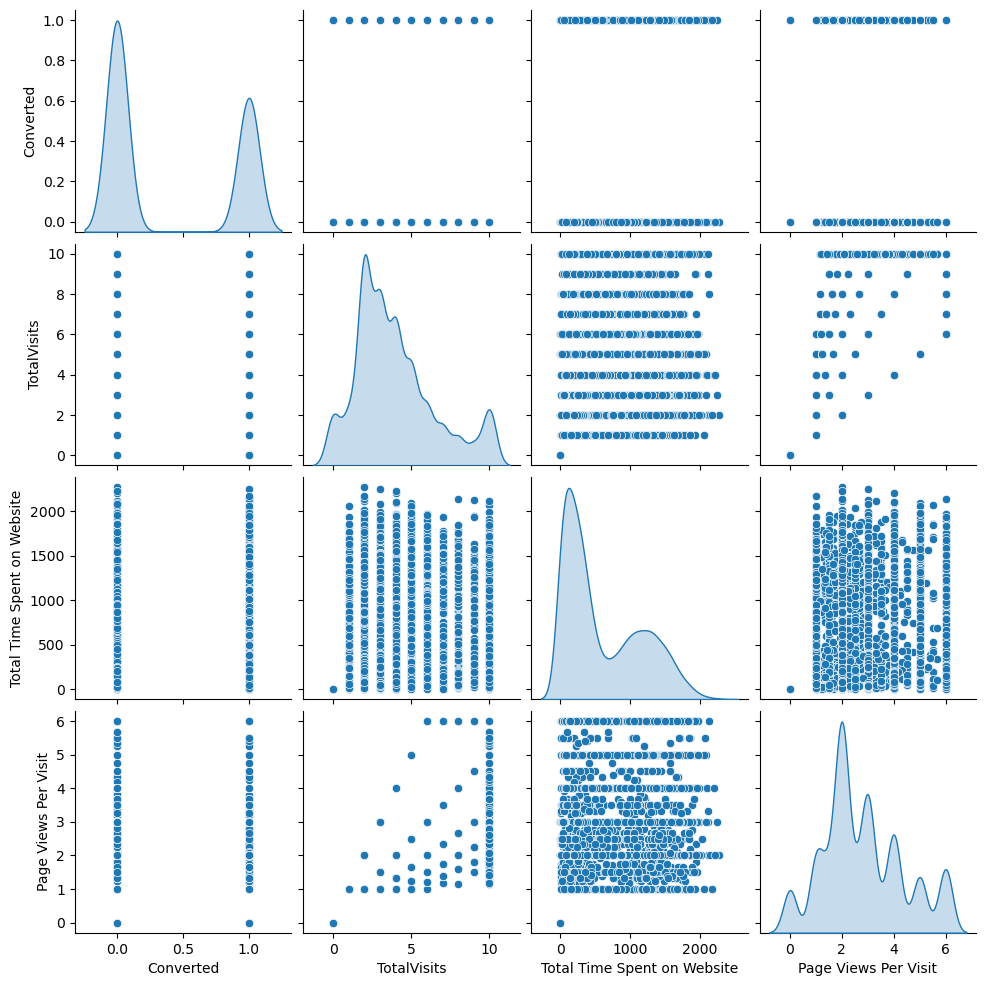

In [2037]:
sns.pairplot(df[['Converted','TotalVisits', 'Total Time Spent on Website', 
                      'Page Views Per Visit']], diag_kind='kde')
plt.show()

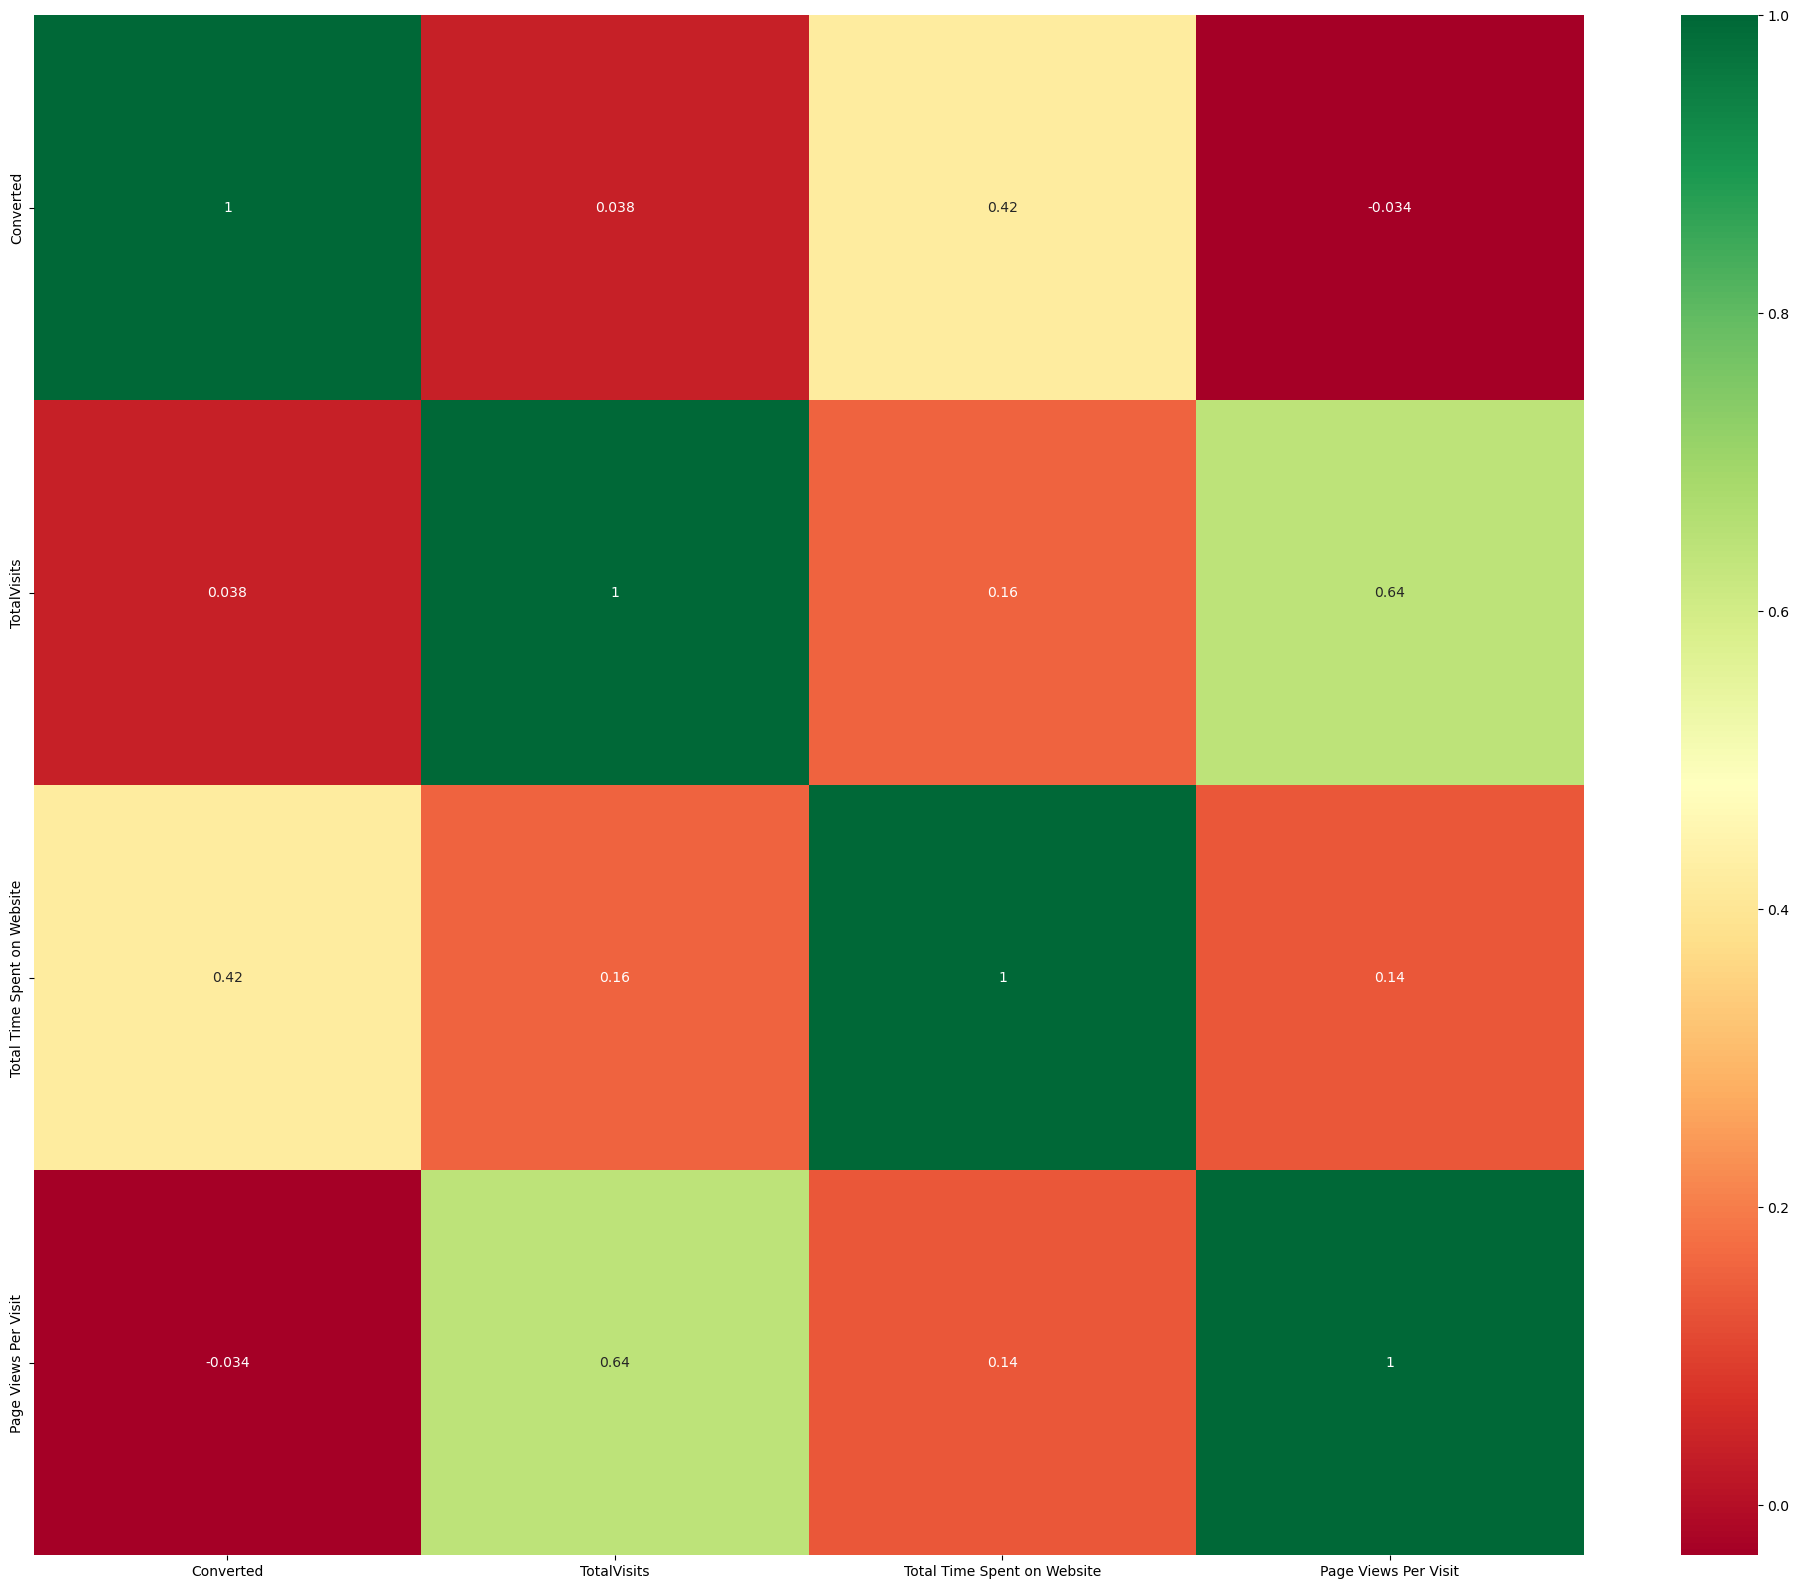

In [2038]:
plt.figure(figsize = (25,20))
sns.heatmap(df_copy.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [2039]:
# Checking the Lead Conversion rate
(sum(df['Converted'])/len(df['Converted'].index))*100

38.805358119190814

In [2040]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Defining a function for calculating VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Step 7: Model Building

In [2041]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [2042]:
# BASE LOGISTIC REGRESSION MODEL(with all columns)

import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train))
result.summary()

                                       Features   VIF
36                                  City_Mumbai   inf
26        Last Activity_Page Visited on Website   inf
29                   Last Activity_Unsubscribed   inf
30  What is your current occupation_Businessman   inf
31    What is your current occupation_Housewife   inf
..                                          ...   ...
67             Specialization_Retail Management  1.22
68        Specialization_Rural and Agribusiness  1.17
55                    Specialization_E-Business  1.15
2                   Total Time Spent on Website  1.14
69           Specialization_Services Excellence  1.09

[72 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5054
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 18 Aug 2023   Deviance:                   1.1458e+05
Time:                        19:28:56   Pearson chi2:                 5.60e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.946e+26   5.83e+19   1.02e+07      0.000    5.95e+26    5.95e+26
Do Not Email                                         -6.629e+14   4.57e+06  -1.45e+08      0.000   -6.63e+14   -6.63e+14
TotalVisits                                           3.425e+14   5.26e+06   6.51e+07      0.000    3.42e+14    3.42e+14
Total Time Spent on Website                           6.642e+14   4.15e+06    1.6e+08      0.000    6.64e+14    6.64e+14
Page Views Per Visit                                 -2.198e+14   5.36e+06   -4.1e+07      0.000    -2.2e+14    -2.2e+14
A free copy of Mastering The Interview               -8.674e+13   2.72e+06  -3.18e+07      0.000   -8.67e+13   -8.67e+13
Lead Origin_API                                      -1.207e+27   1.18e+20  -1.02e+07      0.000   -1.21e+27   -1.21e+27
Lead Origin_Landing Page Submission                  -1.207e+27   1.18e+20  -1.02e+07      0.000   -1.21e+27   -1.21e+27
Lead Origin_Lead Add Form                            -1.207e+27   1.18e+20  -1.02e+07      0.000   -1.21e+27   -1.21e+27
Lead Origin_Lead Import                              -1.207e+27   1.18e+20  -1.02e+07      0.000   -1.21e+27   -1.21e+27
Lead Source_Direct Traffic                             3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Facebook                                   3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Google                                     3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Olark Chat                                 3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Organic Search                             3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Others                                     3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Reference                                  3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Referral Sites                             3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Lead Source_Welingak Website                           3.27e+26   3.21e+19   1.02e+07      0.000    3.27e+26    3.27e+26
Last Activity_Converted to Lead                       1.682e+26   1.65e+19   1.02e+07      0.000    1.68e+26    1.68e+26
Last Activity_Email Bounced                           1.682e+26   1.65e+19   1.02e+07      0.000    1.68e+26    1.68e+26
Last Activity_Email Link Clicked                      1.682e+26   1.65e+19   1.02e+07      0.000    1.68e+26    1.68e+26
Last Activity_Email Opened                            1.68

#### Since the number of columns are very high and VIF for many columns is infinity, we will approach the modeling using RFE

### Step 8: Feature Selection Using RFE

In [2043]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [2044]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [2045]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 42),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 6),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Opened', False, 46),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Had a Phone Conversation'

In [2046]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [2047]:
# 1st LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features    VIF
6                           Lead Origin_Lead Add Form  38.21
8                               Lead Source_Reference  32.33
3                                Page Views Per Visit   8.74
5                 Lead Origin_Landing Page Submission   7.13
9                        Lead Source_Welingak Website   6.85
1                                         TotalVisits   6.52
4                                     Lead Origin_API   3.48
2                         Total Time Spent on Website   2.43
10             Last Activity_Had a Phone Conversation   1.79
15     Last Notable Activity_Had a Phone Conversation   1.79
16                     Last Notable Activity_Modified   1.78
11                             Last Activity_SMS Sent   1.60
13              What is your current occupation_Other   1.45
7                              Lead Source_Olark Chat   1.31
18      Last Notable Activity_Page Visited on Website   1.20
14  What is your current

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5100
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2139.8
Date:                Fri, 18 Aug 2023   Deviance:                       4279.5
Time:                        19:29:07   Pearson chi2:                 4.95e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1819      0.525     -0.347      0.729      -1.210       0.847
Do Not Email                                            -1.3900      0.187     -7.449      0.000      -1.756      -1.024
TotalVisits                                              1.3140      0.202      6.496      0.000       0.918       1.710
Total Time Spent on Website                              4.6047      0.172     26.791      0.000       4.268       4.942
Page Views Per Visit                                    -1.0138      0.211     -4.815      0.000      -1.426      -0.601
Lead Origin_API                                         -1.6724      0.536     -3.118      0.002      -2.724      -0.621
Lead Origin_Landing Page Submission                     -1.8946      0.535     -3.539      0.000      -2.944      -0.845
Lead Origin_Lead Add Form                                0.1674      1.348      0.124      0.901      -2.474       2.809
Lead Source_Olark Chat                                   1.4186      0.192      7.406      0.000       1.043       1.794
Lead Source_Reference                                    1.8093      1.275      1.419      0.156      -0.690       4.308
Lead Source_Welingak Website                             2.6877      1.452      1.852      0.064      -0.157       5.533
Last Activity_Had a Phone Conversation                   1.1240      0.870      1.291      0.197      -0.582       2.830
Last Activity_SMS Sent                                   1.2574      0.084     14.940      0.000       1.092       1.422
What is your current occupation_Housewife               24.0711   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
What is your current occupation_Other                   -1.1334      0.100    -11.328      0.000      -1.330      -0.937
What is your current occupation_Working Professional     2.6166      0.199     13.182      0.000       2.228       3.006
Last Notable Activity_Had a Phone Conversation          22.9433   2.58e+04      0.001      0.999   -5.06e+04    5.06e+04
Last Notable Activity_Modified                          -0.7891      0.089     -8.897      0.000      -0.963      -0.615
Last Notable Activity_Olark Chat Conversation           -1.3418      0.419     -3.203      0.001      -2.163      -0.521
Last Notable Activity_Page Visited on Website           -0.5851      0.208     -2.808      0.005      -0.994      -0.177
Last Notable Activity_Unreachable                        1.7561      0.558      3.145      0.002       0.662       2.850
========================================================================================================================
"""

In [2048]:
# Dropping the column 
cols = cols.drop('Lead Origin_Lead Add Form')

# 2nd LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
3                                Page Views Per Visit  8.74
5                 Lead Origin_Landing Page Submission  7.09
1                                         TotalVisits  6.52
4                                     Lead Origin_API  3.46
2                         Total Time Spent on Website  2.43
9              Last Activity_Had a Phone Conversation  1.79
14     Last Notable Activity_Had a Phone Conversation  1.79
15                     Last Notable Activity_Modified  1.78
10                             Last Activity_SMS Sent  1.60
12              What is your current occupation_Other  1.45
6                              Lead Source_Olark Chat  1.30
17      Last Notable Activity_Page Visited on Website  1.20
13  What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.15
7                               Lead Source_Reference  1.10
16      Last Notable Activity_Olark Chat

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5101
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2139.8
Date:                Fri, 18 Aug 2023   Deviance:                       4279.6
Time:                        19:29:10   Pearson chi2:                 4.95e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1561      0.481     -0.324      0.746      -1.099       0.787
Do Not Email                                            -1.3901      0.187     -7.449      0.000      -1.756      -1.024
TotalVisits                                              1.3139      0.202      6.496      0.000       0.917       1.710
Total Time Spent on Website                              4.6053      0.172     26.805      0.000       4.269       4.942
Page Views Per Visit                                    -1.0133      0.211     -4.813      0.000      -1.426      -0.601
Lead Origin_API                                         -1.6987      0.492     -3.451      0.001      -2.663      -0.734
Lead Origin_Landing Page Submission                     -1.9208      0.491     -3.909      0.000      -2.884      -0.958
Lead Source_Olark Chat                                   1.4196      0.191      7.421      0.000       1.045       1.795
Lead Source_Reference                                    1.9509      0.560      3.481      0.000       0.852       3.049
Lead Source_Welingak Website                             2.8293      0.892      3.171      0.002       1.080       4.578
Last Activity_Had a Phone Conversation                   1.1241      0.870      1.291      0.197      -0.582       2.830
Last Activity_SMS Sent                                   1.2574      0.084     14.939      0.000       1.092       1.422
What is your current occupation_Housewife               24.0712   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
What is your current occupation_Other                   -1.1335      0.100    -11.329      0.000      -1.330      -0.937
What is your current occupation_Working Professional     2.6166      0.199     13.182      0.000       2.228       3.006
Last Notable Activity_Had a Phone Conversation          22.9432   2.58e+04      0.001      0.999   -5.06e+04    5.06e+04
Last Notable Activity_Modified                          -0.7892      0.089     -8.898      0.000      -0.963      -0.615
Last Notable Activity_Olark Chat Conversation           -1.3420      0.419     -3.203      0.001      -2.163      -0.521
Last Notable Activity_Page Visited on Website           -0.5842      0.208     -2.806      0.005      -0.992      -0.176
Last Notable Activity_Unreachable                        1.7561      0.558      3.145      0.002       0.662       2.850
========================================================================================================================
"""

In [2049]:
# Dropping the column 
cols = cols.drop('Page Views Per Visit')

# 3rd LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
4                 Lead Origin_Landing Page Submission  5.51
1                                         TotalVisits  4.16
3                                     Lead Origin_API  3.04
2                         Total Time Spent on Website  2.43
8              Last Activity_Had a Phone Conversation  1.79
13     Last Notable Activity_Had a Phone Conversation  1.79
14                     Last Notable Activity_Modified  1.78
9                              Last Activity_SMS Sent  1.59
11              What is your current occupation_Other  1.45
5                              Lead Source_Olark Chat  1.26
12  What is your current occupation_Working Profes...  1.16
16      Last Notable Activity_Page Visited on Website  1.16
0                                        Do Not Email  1.15
6                               Lead Source_Reference  1.10
15      Last Notable Activity_Olark Chat Conversation  1.05
7                        Lead Source_Wel

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5102
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2151.5
Date:                Fri, 18 Aug 2023   Deviance:                       4303.1
Time:                        19:29:14   Pearson chi2:                 4.92e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2101      0.485     -0.433      0.665      -1.161       0.741
Do Not Email                                            -1.3972      0.186     -7.506      0.000      -1.762      -1.032
TotalVisits                                              0.7455      0.164      4.550      0.000       0.424       1.067
Total Time Spent on Website                              4.5838      0.171     26.783      0.000       4.248       4.919
Lead Origin_API                                         -1.8626      0.495     -3.760      0.000      -2.833      -0.892
Lead Origin_Landing Page Submission                     -2.1495      0.494     -4.355      0.000      -3.117      -1.182
Lead Source_Olark Chat                                   1.5986      0.188      8.517      0.000       1.231       1.966
Lead Source_Reference                                    1.9971      0.564      3.542      0.000       0.892       3.102
Lead Source_Welingak Website                             2.8732      0.895      3.211      0.001       1.119       4.627
Last Activity_Had a Phone Conversation                   1.0463      0.869      1.203      0.229      -0.658       2.750
Last Activity_SMS Sent                                   1.2199      0.083     14.625      0.000       1.056       1.383
What is your current occupation_Housewife               24.1206   2.41e+04      0.001      0.999   -4.71e+04    4.72e+04
What is your current occupation_Other                   -1.1185      0.099    -11.252      0.000      -1.313      -0.924
What is your current occupation_Working Professional     2.6217      0.199     13.207      0.000       2.233       3.011
Last Notable Activity_Had a Phone Conversation          22.9398   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
Last Notable Activity_Modified                          -0.7738      0.088     -8.761      0.000      -0.947      -0.601
Last Notable Activity_Olark Chat Conversation           -1.2723      0.414     -3.072      0.002      -2.084      -0.460
Last Notable Activity_Page Visited on Website           -0.4051      0.203     -1.997      0.046      -0.803      -0.008
Last Notable Activity_Unreachable                        1.7004      0.569      2.987      0.003       0.585       2.816
========================================================================================================================
"""

In [2050]:
# Dropping the column 
cols = cols.drop('Lead Origin_Landing Page Submission')

# 4th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.49
2                         Total Time Spent on Website  2.10
7              Last Activity_Had a Phone Conversation  1.79
12     Last Notable Activity_Had a Phone Conversation  1.79
3                                     Lead Origin_API  1.57
13                     Last Notable Activity_Modified  1.51
8                              Last Activity_SMS Sent  1.46
10              What is your current occupation_Other  1.38
4                              Lead Source_Olark Chat  1.22
15      Last Notable Activity_Page Visited on Website  1.16
11  What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.13
5                               Lead Source_Reference  1.07
14      Last Notable Activity_Olark Chat Conversation  1.05
9           What is your current occupation_Housewife  1.01
6                        Lead Source_Wel

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5103
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2160.0
Date:                Fri, 18 Aug 2023   Deviance:                       4320.0
Time:                        19:29:26   Pearson chi2:                 4.92e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2917      0.113    -20.298      0.000      -2.513      -2.070
Do Not Email                                            -1.4086      0.186     -7.592      0.000      -1.772      -1.045
TotalVisits                                              0.6815      0.163      4.186      0.000       0.362       1.001
Total Time Spent on Website                              4.5343      0.170     26.668      0.000       4.201       4.868
Lead Origin_API                                          0.2630      0.090      2.906      0.004       0.086       0.440
Lead Source_Olark Chat                                   1.5898      0.187      8.521      0.000       1.224       1.956
Lead Source_Reference                                    4.0867      0.305     13.420      0.000       3.490       4.684
Lead Source_Welingak Website                             4.9656      0.758      6.549      0.000       3.479       6.452
Last Activity_Had a Phone Conversation                   1.0445      0.868      1.204      0.229      -0.656       2.745
Last Activity_SMS Sent                                   1.2070      0.083     14.512      0.000       1.044       1.370
What is your current occupation_Housewife               24.0898   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
What is your current occupation_Other                   -1.1233      0.099    -11.329      0.000      -1.318      -0.929
What is your current occupation_Working Professional     2.6001      0.198     13.129      0.000       2.212       2.988
Last Notable Activity_Had a Phone Conversation          22.9338   2.63e+04      0.001      0.999   -5.15e+04    5.16e+04
Last Notable Activity_Modified                          -0.7781      0.088     -8.831      0.000      -0.951      -0.605
Last Notable Activity_Olark Chat Conversation           -1.2701      0.413     -3.076      0.002      -2.079      -0.461
Last Notable Activity_Page Visited on Website           -0.3848      0.202     -1.910      0.056      -0.780       0.010
Last Notable Activity_Unreachable                        1.6775      0.568      2.951      0.003       0.563       2.792
========================================================================================================================
"""

In [2051]:
# Dropping the column 
cols = cols.drop('Last Notable Activity_Had a Phone Conversation')

# 5th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.49
2                         Total Time Spent on Website  2.10
3                                     Lead Origin_API  1.57
12                     Last Notable Activity_Modified  1.51
8                              Last Activity_SMS Sent  1.46
10              What is your current occupation_Other  1.38
4                              Lead Source_Olark Chat  1.22
14      Last Notable Activity_Page Visited on Website  1.16
11  What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.13
5                               Lead Source_Reference  1.07
13      Last Notable Activity_Olark Chat Conversation  1.05
6                        Lead Source_Welingak Website  1.01
7              Last Activity_Had a Phone Conversation  1.01
9           What is your current occupation_Housewife  1.01
15                  Last Notable Activit

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5104
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.1
Date:                Fri, 18 Aug 2023   Deviance:                       4324.2
Time:                        19:29:40   Pearson chi2:                 4.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2890      0.113    -20.289      0.000      -2.510      -2.068
Do Not Email                                            -1.4099      0.185     -7.601      0.000      -1.773      -1.046
TotalVisits                                              0.6869      0.163      4.223      0.000       0.368       1.006
Total Time Spent on Website                              4.5296      0.170     26.655      0.000       4.197       4.863
Lead Origin_API                                          0.2634      0.090      2.912      0.004       0.086       0.441
Lead Source_Olark Chat                                   1.5902      0.187      8.521      0.000       1.224       1.956
Lead Source_Reference                                    4.0836      0.305     13.405      0.000       3.487       4.681
Lead Source_Welingak Website                             4.9687      0.758      6.553      0.000       3.482       6.455
Last Activity_Had a Phone Conversation                   2.0162      0.693      2.909      0.004       0.658       3.375
Last Activity_SMS Sent                                   1.2055      0.083     14.496      0.000       1.043       1.369
What is your current occupation_Housewife               23.0904   1.46e+04      0.002      0.999   -2.86e+04    2.87e+04
What is your current occupation_Other                   -1.1250      0.099    -11.342      0.000      -1.319      -0.931
What is your current occupation_Working Professional     2.5979      0.198     13.113      0.000       2.210       2.986
Last Notable Activity_Modified                          -0.7870      0.088     -8.942      0.000      -0.960      -0.615
Last Notable Activity_Olark Chat Conversation           -1.2729      0.413     -3.084      0.002      -2.082      -0.464
Last Notable Activity_Page Visited on Website           -0.3892      0.201     -1.932      0.053      -0.784       0.006
Last Notable Activity_Unreachable                        1.6741      0.568      2.945      0.003       0.560       2.788
========================================================================================================================
"""

In [2052]:
# Dropping the column 
cols = cols.drop('What is your current occupation_Housewife')

# 6th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.49
2                         Total Time Spent on Website  2.10
3                                     Lead Origin_API  1.57
11                     Last Notable Activity_Modified  1.51
8                              Last Activity_SMS Sent  1.46
9               What is your current occupation_Other  1.38
4                              Lead Source_Olark Chat  1.22
13      Last Notable Activity_Page Visited on Website  1.16
10  What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.13
5                               Lead Source_Reference  1.07
12      Last Notable Activity_Olark Chat Conversation  1.05
6                        Lead Source_Welingak Website  1.01
7              Last Activity_Had a Phone Conversation  1.01
14                  Last Notable Activity_Unreachable  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5105
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2169.4
Date:                Fri, 18 Aug 2023   Deviance:                       4338.7
Time:                        19:29:52   Pearson chi2:                 4.94e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2712      0.112    -20.201      0.000      -2.492      -2.051
Do Not Email                                            -1.4156      0.185     -7.636      0.000      -1.779      -1.052
TotalVisits                                              0.6754      0.162      4.158      0.000       0.357       0.994
Total Time Spent on Website                              4.5270      0.170     26.680      0.000       4.194       4.860
Lead Origin_API                                          0.2561      0.090      2.837      0.005       0.079       0.433
Lead Source_Olark Chat                                   1.5852      0.186      8.502      0.000       1.220       1.951
Lead Source_Reference                                    4.0972      0.304     13.489      0.000       3.502       4.693
Lead Source_Welingak Website                             4.9546      0.758      6.534      0.000       3.468       6.441
Last Activity_Had a Phone Conversation                   2.0066      0.693      2.896      0.004       0.649       3.365
Last Activity_SMS Sent                                   1.1961      0.083     14.402      0.000       1.033       1.359
What is your current occupation_Other                   -1.1309      0.099    -11.413      0.000      -1.325      -0.937
What is your current occupation_Working Professional     2.5881      0.198     13.072      0.000       2.200       2.976
Last Notable Activity_Modified                          -0.7834      0.088     -8.923      0.000      -0.955      -0.611
Last Notable Activity_Olark Chat Conversation           -1.2757      0.413     -3.092      0.002      -2.084      -0.467
Last Notable Activity_Page Visited on Website           -0.3937      0.201     -1.955      0.051      -0.788       0.001
Last Notable Activity_Unreachable                        1.6667      0.569      2.932      0.003       0.552       2.781
========================================================================================================================
"""

In [2053]:
# Dropping the column 
cols = cols.drop('Last Notable Activity_Page Visited on Website')

# 7th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.30
2                         Total Time Spent on Website  2.10
3                                     Lead Origin_API  1.56
11                     Last Notable Activity_Modified  1.46
8                              Last Activity_SMS Sent  1.42
9               What is your current occupation_Other  1.38
4                              Lead Source_Olark Chat  1.21
10  What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.12
5                               Lead Source_Reference  1.06
12      Last Notable Activity_Olark Chat Conversation  1.04
6                        Lead Source_Welingak Website  1.01
7              Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5106
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.3
Date:                Fri, 18 Aug 2023   Deviance:                       4342.6
Time:                        19:30:07   Pearson chi2:                 4.93e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3851
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2723      0.112    -20.222      0.000      -2.492      -2.052
Do Not Email                                            -1.4375      0.185     -7.776      0.000      -1.800      -1.075
TotalVisits                                              0.6092      0.159      3.837      0.000       0.298       0.920
Total Time Spent on Website                              4.5252      0.170     26.687      0.000       4.193       4.858
Lead Origin_API                                          0.2521      0.090      2.795      0.005       0.075       0.429
Lead Source_Olark Chat                                   1.5590      0.186      8.388      0.000       1.195       1.923
Lead Source_Reference                                    4.0764      0.304     13.429      0.000       3.481       4.671
Lead Source_Welingak Website                             4.9219      0.759      6.486      0.000       3.434       6.409
Last Activity_Had a Phone Conversation                   2.0339      0.692      2.939      0.003       0.678       3.390
Last Activity_SMS Sent                                   1.2237      0.082     14.939      0.000       1.063       1.384
What is your current occupation_Other                   -1.1354      0.099    -11.463      0.000      -1.330      -0.941
What is your current occupation_Working Professional     2.5932      0.198     13.108      0.000       2.205       2.981
Last Notable Activity_Modified                          -0.7596      0.087     -8.730      0.000      -0.930      -0.589
Last Notable Activity_Olark Chat Conversation           -1.2337      0.412     -2.997      0.003      -2.040      -0.427
Last Notable Activity_Unreachable                        1.6992      0.569      2.988      0.003       0.585       2.814
========================================================================================================================
"""

In [2054]:
# Dropping the column 
cols = cols.drop('Lead Origin_API')

# 8th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.28
2                         Total Time Spent on Website  2.06
7                              Last Activity_SMS Sent  1.42
10                     Last Notable Activity_Modified  1.40
8               What is your current occupation_Other  1.36
9   What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.12
4                               Lead Source_Reference  1.06
3                              Lead Source_Olark Chat  1.04
11      Last Notable Activity_Olark Chat Conversation  1.04
5                        Lead Source_Welingak Website  1.01
6              Last Activity_Had a Phone Conversation  1.01
12                  Last Notable Activity_Unreachable  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5107
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2175.2
Date:                Fri, 18 Aug 2023   Deviance:                       4350.4
Time:                        19:30:39   Pearson chi2:                 4.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1878      0.107    -20.352      0.000      -2.398      -1.977
Do Not Email                                            -1.4598      0.184     -7.936      0.000      -1.820      -1.099
TotalVisits                                              0.5639      0.158      3.575      0.000       0.255       0.873
Total Time Spent on Website                              4.5252      0.169     26.716      0.000       4.193       4.857
Lead Source_Olark Chat                                   1.7246      0.176      9.781      0.000       1.379       2.070
Lead Source_Reference                                    3.9896      0.302     13.228      0.000       3.398       4.581
Lead Source_Welingak Website                             4.8410      0.758      6.382      0.000       3.354       6.328
Last Activity_Had a Phone Conversation                   2.0535      0.689      2.979      0.003       0.703       3.405
Last Activity_SMS Sent                                   1.2136      0.082     14.864      0.000       1.054       1.374
What is your current occupation_Other                   -1.1205      0.099    -11.343      0.000      -1.314      -0.927
What is your current occupation_Working Professional     2.5752      0.197     13.053      0.000       2.189       2.962
Last Notable Activity_Modified                          -0.7443      0.087     -8.582      0.000      -0.914      -0.574
Last Notable Activity_Olark Chat Conversation           -1.1700      0.413     -2.834      0.005      -1.979      -0.361
Last Notable Activity_Unreachable                        1.6988      0.568      2.990      0.003       0.585       2.813
========================================================================================================================
"""

In [2055]:
# Dropping the column 
cols = cols.drop('Last Notable Activity_Olark Chat Conversation')

# 9th LOGISTIC REGRESSION MODEL
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(calculateVIF(X_train[cols]))
result.summary()

                                             Features   VIF
1                                         TotalVisits  2.27
2                         Total Time Spent on Website  2.06
7                              Last Activity_SMS Sent  1.41
10                     Last Notable Activity_Modified  1.40
8               What is your current occupation_Other  1.35
9   What is your current occupation_Working Profes...  1.15
0                                        Do Not Email  1.12
4                               Lead Source_Reference  1.06
3                              Lead Source_Olark Chat  1.03
5                        Lead Source_Welingak Website  1.01
6              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5121
Model:                            GLM   Df Residuals:                     5108
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2179.7
Date:                Fri, 18 Aug 2023   Deviance:                       4359.5
Time:                        19:31:15   Pearson chi2:                 4.93e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1996      0.107    -20.470      0.000      -2.410      -1.989
Do Not Email                                            -1.4545      0.184     -7.914      0.000      -1.815      -1.094
TotalVisits                                              0.5609      0.158      3.559      0.000       0.252       0.870
Total Time Spent on Website                              4.5046      0.169     26.655      0.000       4.173       4.836
Lead Source_Olark Chat                                   1.6640      0.175      9.530      0.000       1.322       2.006
Lead Source_Reference                                    3.9846      0.302     13.212      0.000       3.394       4.576
Lead Source_Welingak Website                             4.8346      0.758      6.376      0.000       3.348       6.321
Last Activity_Had a Phone Conversation                   2.0611      0.689      2.993      0.003       0.712       3.411
Last Activity_SMS Sent                                   1.2321      0.081     15.141      0.000       1.073       1.392
What is your current occupation_Other                   -1.1313      0.099    -11.464      0.000      -1.325      -0.938
What is your current occupation_Working Professional     2.5774      0.197     13.063      0.000       2.191       2.964
Last Notable Activity_Modified                          -0.7243      0.086     -8.378      0.000      -0.894      -0.555
Last Notable Activity_Unreachable                        1.7270      0.568      3.040      0.002       0.614       2.840
========================================================================================================================
"""

In [2056]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)

#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
4802,1,0.820530,4802
8302,0,0.468621,8302
8724,0,0.493013,8724
6932,1,0.933083,6932
1716,1,0.726729,1716


In [2057]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
4802,1,0.820530,4802,1
8302,0,0.468621,8302,0
8724,0,0.493013,8724,0
6932,1,0.933083,6932,1
1716,1,0.726729,1716,1


In [2058]:
from sklearn import metrics
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2736  406]
 [ 630 1349]]


In [2059]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976957625463776

### Metrics beyond accuracy

In [2060]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2061]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.6816574027286508
Specificity :  0.8707829408020369
False Positive Rate : 0.12921705919796309
Positive Predictive Value : 0.7686609686609687
Negative predictive value : 0.8128342245989305


### Step 9: Plotting the ROC Curve

In [2062]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2063]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

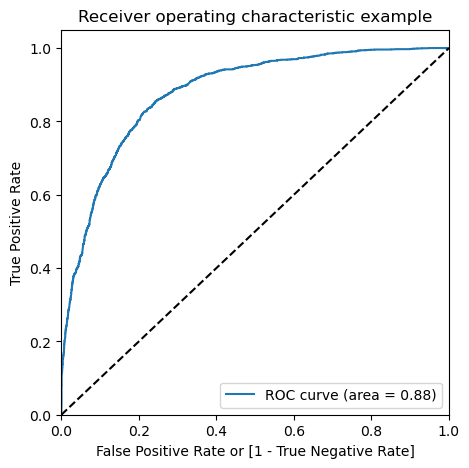

In [2064]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [2065]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4802,1,0.820530,4802,1,1,1,1,1,1,1,1,1,1,0
8302,0,0.468621,8302,0,1,1,1,1,1,0,0,0,0,0
8724,0,0.493013,8724,0,1,1,1,1,1,0,0,0,0,0
6932,1,0.933083,6932,1,1,1,1,1,1,1,1,1,1,1
1716,1,0.726729,1716,1,1,1,1,1,1,1,1,1,0,0


In [2066]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386448  1.000000  0.000000
0.1   0.1  0.614333  0.970187  0.390197
0.2   0.2  0.748291  0.924204  0.637492
0.3   0.3  0.788518  0.863567  0.741248
0.4   0.4  0.802382  0.777160  0.818269
0.5   0.5  0.797696  0.681657  0.870783
0.6   0.6  0.789494  0.599798  0.908975
0.7   0.7  0.766647  0.496716  0.936665
0.8   0.8  0.740871  0.383022  0.966264
0.9   0.9  0.693810  0.224356  0.989497


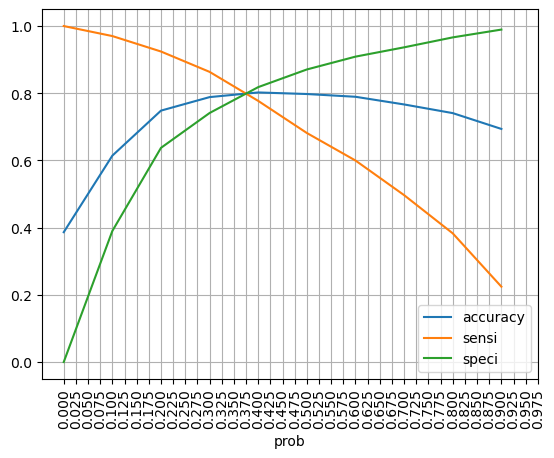

In [2067]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
tick_positions = np.arange(0, 1, 0.025)
plt.xticks(tick_positions, rotation=90)
plt.grid(True) 
plt.show()

In [2068]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.375 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4802,1,0.820530,4802,1,1,1,1,1,1,1,1,1,1,0,1
8302,0,0.468621,8302,0,1,1,1,1,1,0,0,0,0,0,1
8724,0,0.493013,8724,0,1,1,1,1,1,0,0,0,0,0,1
6932,1,0.933083,6932,1,1,1,1,1,1,1,1,1,1,1,1
1716,1,0.726729,1716,1,1,1,1,1,1,1,1,1,0,0,1


In [2069]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
4802,1,0.820530,4802,1,1,1,1,1,1,1,1,1,1,0,1,82
8302,0,0.468621,8302,0,1,1,1,1,1,0,0,0,0,0,1,47
8724,0,0.493013,8724,0,1,1,1,1,1,0,0,0,0,0,1,49
6932,1,0.933083,6932,1,1,1,1,1,1,1,1,1,1,1,1,93
1716,1,0.726729,1716,1,1,1,1,1,1,1,1,1,0,0,1,73
1512,1,0.499391,1512,0,1,1,1,1,1,0,0,0,0,0,1,50
9188,1,0.181844,9188,0,1,1,0,0,0,0,0,0,0,0,0,18
6644,0,0.642866,6644,1,1,1,1,1,1,1,1,0,0,0,1,64
6967,0,0.062704,6967,0,1,0,0,0,0,0,0,0,0,0,0,6
4474,0,0.011352,4474,0,1,0,0,0,0,0,0,0,0,0,0,1


In [2070]:
#Accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80199179847686

In [2071]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2523,  619],
       [ 395, 1584]])

In [2072]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2073]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.8004042445679637
Specificity :  0.8029917250159134
False Positive Rate : 0.19700827498408657
Positive Predictive Value : 0.7190195188379482
Negative predictive value : 0.8646333104866347


In [2074]:
from sklearn.metrics import precision_score, recall_score

In [2075]:
print("Precision :", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall :", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision : 0.7190195188379482
Recall : 0.8004042445679637


### Precision and recall tradeoff

In [2076]:
from sklearn.metrics import precision_recall_curve

In [2077]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(4802    1
 8302    0
 8724    0
 6932    1
 1716    1
        ..
 606     0
 2715    0
 3644    0
 6627    1
 1411    1
 Name: Converted, Length: 5121, dtype: int64,
 4802    1
 8302    0
 8724    0
 6932    1
 1716    1
        ..
 606     0
 2715    0
 3644    0
 6627    1
 1411    0
 Name: predicted, Length: 5121, dtype: int64)

In [2078]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

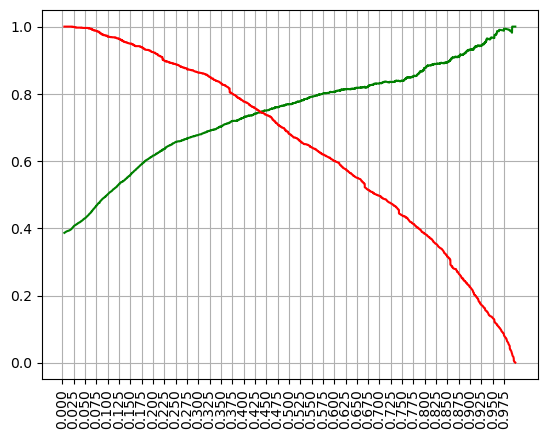

In [2097]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
tick_positions = np.arange(0, 1, 0.025)
plt.xticks(tick_positions, rotation=90)
plt.grid(True)
plt.show()

### Step 11: Making predictions on the test set

In [2080]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website','Page Views Per Visit']])

In [2081]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2995,0,0.7,0.032570,1,0,0,0,1,1,0,0,0
3772,0,0.2,0.118398,0,0,0,0,0,1,0,0,0
7068,0,0.4,0.001320,0,0,0,0,1,0,0,0,0
8282,0,0.9,0.579225,0,0,0,0,0,0,1,0,0
4200,0,0.6,0.616197,0,0,0,0,1,0,0,0,0


In [2082]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

2995    0.526134
3772    0.063846
7068    0.323623
8282    0.970455
4200    0.895183
2245    0.770267
4288    0.484326
1052    0.699638
1581    0.466728
1279    0.350769
dtype: float64

In [2083]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2995,0.526134
3772,0.063846
7068,0.323623
8282,0.970455
4200,0.895183


In [2084]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2085]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2086]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,2995,0.526134
1,0,3772,0.063846
2,0,7068,0.323623
3,1,8282,0.970455
4,1,4200,0.895183


In [2087]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [2098]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2995,0,0.526134,1,53
1,3772,0,0.063846,0,6
2,7068,0,0.323623,0,32
3,8282,1,0.970455,1,97
4,4200,1,0.895183,1,90


In [2099]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7913439635535308


In [2100]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1111,  224],
       [ 234,  626]])

In [2101]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [2102]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.727906976744186
Specificity :  0.8322097378277153
False Positive Rate : 0.16779026217228465
Positive Predictive Value : 0.7364705882352941
Negative predictive value : 0.8260223048327138


In [2103]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2995,0,0.526134,1,53
1,3772,0,0.063846,0,6
2,7068,0,0.323623,0,32
3,8282,1,0.970455,1,97
4,4200,1,0.895183,1,90


### Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data:
##### Accuracy : 80.2%
##### Sensitivity :  80.04%
##### Specificity :  80.30%
##### False Positive Rate : 19.70%
##### Positive Predictive Value : 71.90%
##### Negative predictive value : 86.46%


#### Test Data:
##### Accuracy : 79.13%
##### Sensitivity :  72.79%
##### Specificity :  83.22%
##### False Positive Rate : 16.78%
##### Positive Predictive Value : 73.65%
##### Negative predictive value : 82.60%

### 2) Finding out the leads which should be contacted:

In [2094]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3,8282,1,0.970455,1,97
4,4200,1,0.895183,1,90
16,2159,1,0.855412,1,86
17,9154,0,0.929623,1,93
28,4799,1,0.940175,1,94
...,...,...,...,...,...
2159,205,1,0.856322,1,86
2166,3384,1,0.891267,1,89
2169,4365,1,0.885120,1,89
2178,1014,0,0.856322,1,86


In [2095]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([8282, 4200, 2159, 9154, 4799, 2692, 4030, 1803, 2067, 6499, 7036,
       4941, 3814, 4466, 6046, 1388, 2438, 1265, 7835, 7653, 4233, 1887,
       1527, 6758, 8920, 5276, 2011, 4187, 6438, 6092, 4038, 2307,  809,
       8293, 1458, 3488, 2652, 4646, 8105, 6323, 7814, 7823, 4607, 5439,
       7636, 4578, 4338, 2844, 4909, 5346, 4238, 4382, 5293, 7040, 4844,
       2764, 7166, 8086, 5525,  784, 5275, 1470, 6906, 8393, 5453, 1559,
       7297, 7157, 5430, 4935,  663, 4963, 5783, 7470, 8366, 6540, 2982,
       5535, 7503, 4191, 7962, 4793, 8265,  973, 5337, 8257, 3926, 1566,
       7490, 6156, 7420, 7455, 1605, 6177, 3786, 7326, 8576, 6332, 2854,
       2575, 7245, 4213, 8843, 4778, 7288, 4173, 2547,  319, 8538, 1729,
         66, 3165, 2010, 8620, 7009, 7128, 1612, 6152, 4743, 2629,  934,
       4677, 2410, 7719,  405, 2705, 8990, 6532, 5068, 4700, 5022, 1450,
       4508, 4061, 3770, 8504, 4418, 2392, 5032, 4081, 4592, 4858, 1468,
       4779, 8901, 2128,  829, 1675, 8819, 2542, 69

### 3) Finding out the Important Features from our final model:

In [2096]:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            4.834618
Total Time Spent on Website                             4.504645
Lead Source_Reference                                   3.984645
What is your current occupation_Working Professional    2.577382
Last Activity_Had a Phone Conversation                  2.061140
Last Notable Activity_Unreachable                       1.727008
Lead Source_Olark Chat                                  1.664018
Last Activity_SMS Sent                                  1.232080
TotalVisits                                             0.560921
Last Notable Activity_Modified                         -0.724260
What is your current occupation_Other                  -1.131263
Do Not Email                                           -1.454480
const                                                  -2.199569
dtype: float64